<a href="https://colab.research.google.com/github/a1ire3a/frequency-domain-filter/blob/main/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MSE**

In [ ]:
import numpy as np
import cv2
import urllib.request as url
from skimage.util import random_noise
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

load library

In [ ]:
req = url.urlopen("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
imgArr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(imgArr, cv2.IMREAD_GRAYSCALE)

load image

In [ ]:
def MSE(img, des):
    f = np.fft.fft2(img)
    fs = np.fft.fftshift(f)
    #cv2_imshow(fs)

    fd = np.fft.fft2(des)
    fsd = np.fft.fftshift(fd)
    #cv2_imshow(fsd)
    fs = np.real(fs)
    fsd = np.real(fsd)
    mse = mean_squared_error(fsd, fs)

    return(mse)

function for calculate mean square error between original and destorted image in frequency domain

In [ ]:
res = []
for i in range(0, 100):
    gaussianIMG = np.array(255 * random_noise(img, mode='gaussian',mean=0, var=(i/100))).astype(int)
    res.append(MSE(img, gaussianIMG))

result of 100 epoch with 0.1 step for vaiance of noise

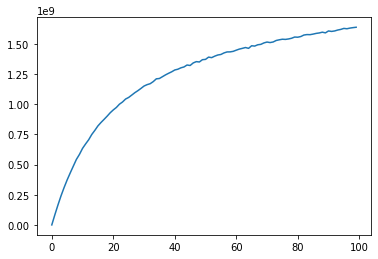

In [ ]:
plt.plot(res)
plt.show()

plot 100 destorted image with mse
x-axis for number of image
y-axis for amount of mse